In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *

from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == 'constant':
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    if case == 'balanced':
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    oracle_gate = oracle_qc.to_gate(label='Oracle')
    return oracle_gate

In [3]:
def dj_algorithm(n, case='random'):
    dj_circuit = QuantumCircuit(n+1, n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.x(n)
    dj_circuit.h(n)   
    
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    
    return dj_circuit

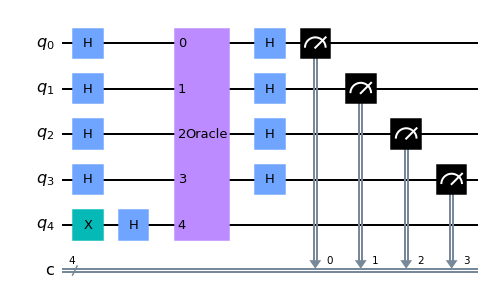

In [4]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

/opt/conda/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/conda/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


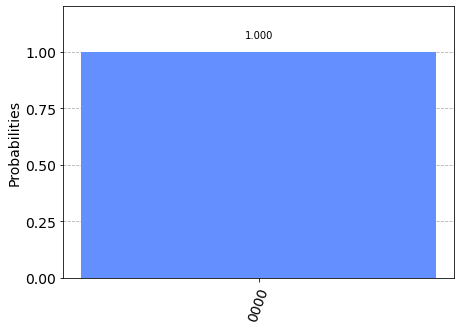

In [5]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'constant')
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()

plot_histogram(answer)

In [42]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                 not x.configuration().simulator and x.status().operational==True))

print(f"least busy backend: {backend}")
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

least busy backend: ibmq_lima


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

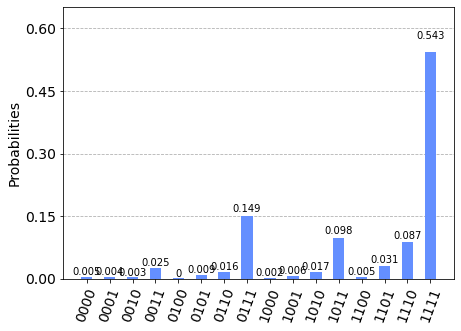

In [43]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

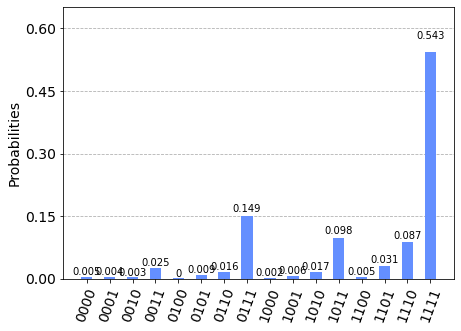

In [44]:
backend = provider.get_backend('...')
old_job = backend.retrieve_job('...')
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)